Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import autoreload
%load_ext autoreload
%autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref

Data

2007 Data

In [2]:
snap07 = pd.read_spss('qcfy2007_spss/qc_pub_fy2007.sav')

In [3]:
snap07.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
snap07.shape

(47469, 769)

In [5]:
snap07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47469 entries, 0 to 47468
Columns: 769 entries, FSAFIL1 to NDISCA16
dtypes: float64(769)
memory usage: 278.5 MB


In [6]:
snap07.isnull().sum()

FSAFIL1         0
FSAFIL2     20739
FSAFIL3     29470
FSAFIL4     36884
FSAFIL5     42301
            ...  
NDISCA12    47455
NDISCA13    47463
NDISCA14    47466
NDISCA15    47469
NDISCA16    47469
Length: 769, dtype: int64

2017 Data

In [7]:
snap17= pd.read_csv('qcfy2017_csv/qc_pub_fy2017.csv')

In [8]:
snap17.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID,STATENAME
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Connecticut


In [9]:
snap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Columns: 814 entries, FSAFIL1 to STATENAME
dtypes: float64(368), int64(445), object(1)
memory usage: 282.8+ MB


In [10]:
snap17.isnull().sum()

FSAFIL1          0
FSAFIL2      22368
FSAFIL3      30458
FSAFIL4      36350
FSAFIL5      40801
             ...  
FSNONCIT         0
FSDIS            0
FSELDER          0
FSKID            0
STATENAME        0
Length: 814, dtype: int64

Target Variable

In [11]:
# 2007: 1= Eligible, 2= Not eligible
snap07['CAT_ELIG'].value_counts()

2.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [12]:
# 2017: 0= Not eligible, 1= Reported eligible, 2= Recorded eligible
snap17['CAT_ELIG'].value_counts()

1    36223
0     7012
2     2295
Name: CAT_ELIG, dtype: int64

In [13]:
# changing both to 0= Not eligible, 1= Eligible
# The replace method allows us to replace a value from a column to another value.
# replace(value we want to replace, the value we are replacing argument 1 with)
snap07['CAT_ELIG'] = snap07['CAT_ELIG'].replace(2,0)
snap17['CAT_ELIG'] = snap17['CAT_ELIG'].replace(2,1)

In [14]:
snap07['CAT_ELIG'].value_counts()

0.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [15]:
snap17['CAT_ELIG'].value_counts()

1    38518
0     7012
Name: CAT_ELIG, dtype: int64

In [16]:
print(f'2017 dataset: {snap17.shape} VS 2007 dataset: {snap07.shape}')

2017 dataset: (45530, 814) VS 2007 dataset: (47469, 769)


Extracting state data

New Mexico

In [17]:
#save New Mexico records
nm07= snap07.loc[snap07['STATE'] == 35].astype('float64')
nm07_target = nm07['CAT_ELIG']
nm07.to_csv('data/nm07.csv',index= None)

In [18]:
nm17= snap17.loc[snap17['STATE'] == 35]
nm17_target= nm17['CAT_ELIG']
nm17= nm17.drop(columns= ['STATENAME'])
nm17= nm17.astype('float64')
nm17.to_csv('data/nm17.csv',index= None)

In [19]:
#New Mexico dataframe
df_nm07= pd.read_csv('data/nm07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_nm17= pd.read_csv('data/nm17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [21]:
df_nm07['CAT_ELIG'].value_counts()

0.0    813
1.0    442
Name: CAT_ELIG, dtype: int64

In [22]:
df_nm17['CAT_ELIG'].value_counts()

1.0    964
Name: CAT_ELIG, dtype: int64

Nebraska

In [23]:
#Save Nebrasa records
ne07= snap07.loc[snap07['STATE'] == 31].astype('float64')
ne07_target= ne07['CAT_ELIG']
ne07.to_csv('data/ne07.csv',index= None)

In [24]:
ne17= snap17.loc[snap17['STATE'] == 31]
ne17_target= ne17['CAT_ELIG']
ne17= ne17.drop(columns= ['STATENAME'])
ne17= ne17.astype('float64')
ne17.to_csv('data/ne17.csv' ,index= None)

In [25]:
#Nebraska dataframe
df_ne07= pd.read_csv('data/ne07.csv')
df_ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_ne17= pd.read_csv('data/ne17.csv')
df_ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [27]:
df_ne07['CAT_ELIG'].value_counts()

0.0    505
1.0    286
Name: CAT_ELIG, dtype: int64

In [28]:
df_ne17['CAT_ELIG'].value_counts()

1.0    894
Name: CAT_ELIG, dtype: int64

Null Values

Full Missing values
New Mexico

In [29]:
with pd.option_context('display.max_rows', None):
    print(df_nm07.isnull().sum().sort_values(ascending=False)[:96])

NDISCA16    1255
CTZN15      1255
E_FINDG9    1255
E_FINDG8    1255
E_FINDG7    1255
E_FINDG6    1255
YRSED16     1255
YRSED15     1255
YRSED14     1255
YRSED13     1255
TIMEPER9    1255
TIMEPER8    1255
TIMEPER7    1255
TIMEPER6    1255
CTZN16      1255
CTZN14      1255
SEX15       1255
CTZN13      1255
OCCDATE9    1255
OCCDATE8    1255
OCCDATE7    1255
OCCDATE6    1255
RACETH16    1255
RACETH15    1255
RACETH14    1255
RACETH13    1255
ELEMENT6    1255
ELEMENT7    1255
ELEMENT8    1255
ELEMENT9    1255
EMPRG13     1255
EMPRG14     1255
EMPRG15     1255
EMPRG16     1255
FSUN15      1255
FSUN14      1255
FSUN13      1255
DIS13       1255
DIS14       1255
DIS15       1255
DIS16       1255
DPCOST16    1255
DPCOST15    1255
DPCOST14    1255
DPCOST13    1255
EMPSTB16    1255
EMPSTB15    1255
EMPSTB14    1255
EMPSTB13    1255
ABWDST16    1255
ABWDST15    1255
ABWDST14    1255
ABWDST13    1255
EMPSTA16    1255
EMPSTA15    1255
EMPSTA14    1255
EMPSTA13    1255
WRKREG16    1255
WRKREG15    12

In [30]:
#Remove those columns.
first_cut= df_nm07.isnull().sum().sort_values(ascending=False)[:96]
first_cut_df= pd.DataFrame([first_cut])
first_cut_df.T
#pivot table
fc_list= list(first_cut_df.columns)

#Remove them
nm07= df_nm07.drop(fc_list,axis=1)
# axis 1 refers to rows or columns. 0 = rows 1 = columns
nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
null_table_count= pd.DataFrame(columns= ['dataframe','null_start'])
null_table_count['dataframe']='nm07','nm17','ne07','ne17'
null_table_count['null_start']= '96','165','144','91'
print('\033[1m' + 'isnull().sum() START count per Dataframe' + '\033[0m')
print(null_table_count)
#shows count of all values that are null

isnull().sum() START count per Dataframe
  dataframe null_start
0      nm07         96
1      nm17        165
2      ne07        144
3      ne17         91


In [32]:
with pd.option_context('display.max_rows', None):
    print(df_nm17.isnull().sum().sort_values(ascending=False)[:165])

WRKREG11    964
AGENCY9     964
WRKREG16    964
WRKREG15    964
WRKREG14    964
DISCOV4     964
EMPRG10     964
EMPRG11     964
EMPRG12     964
EMPRG13     964
EMPRG14     964
EMPRG15     964
EMPRG16     964
DISCOV5     964
DISCOV6     964
DISCOV7     964
DISCOV8     964
DISCOV9     964
VERIF4      964
VERIF5      964
VERIF6      964
WRKREG12    964
AGENCY8     964
CTZN11      964
WORK14      964
CTZN13      964
NDISCA11    964
CTZN15      964
CTZN16      964
NATURE6     964
NATURE7     964
NATURE8     964
NATURE9     964
AGENCY4     964
AGENCY5     964
AGENCY6     964
AGENCY7     964
YRSED10     964
YRSED11     964
YRSED12     964
YRSED13     964
YRSED14     964
YRSED15     964
YRSED16     964
EMPSTA10    964
EMPSTA11    964
EMPSTA12    964
EMPSTA13    964
OCCDATE9    964
TIMEPER4    964
TIMEPER5    964
TIMEPER6    964
TIMEPER7    964
TIMEPER8    964
TIMEPER9    964
E_FINDG4    964
E_FINDG5    964
E_FINDG6    964
E_FINDG7    964
E_FINDG8    964
E_FINDG9    964
NDISCA10    964
WRKREG13

In [33]:
#Remove those columns.
first_cut= df_nm17.isnull().sum().sort_values(ascending=False)[:165]
first_cut_df= pd.DataFrame([first_cut])
first_cut_df.T
#pivot table
fc_list= list(first_cut_df.columns)

#Remove them
nm17= df_nm17.drop(fc_list,axis=1)
nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,WORK4,WORK5,WORK6,WORK7,WORK8,WORK9,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [34]:
with pd.option_context('display.max_rows', None):
    print(df_ne07.isnull().sum().sort_values(ascending=False)[:144])

NDISCA16    791
TIMEPER9    791
EMPRG11     791
EMPRG12     791
EMPRG13     791
EMPRG14     791
EMPRG15     791
EMPRG16     791
E_FINDG6    791
E_FINDG7    791
E_FINDG8    791
E_FINDG9    791
EMPSTA10    791
EMPSTA11    791
EMPSTA12    791
EMPSTA13    791
EMPSTA14    791
EMPSTA15    791
EMPSTA16    791
EMPRG10     791
TIMEPER8    791
CTZN10      791
TIMEPER7    791
CTZN12      791
CTZN13      791
CTZN14      791
CTZN15      791
OCCDATE6    791
OCCDATE7    791
OCCDATE8    791
OCCDATE9    791
YRSED10     791
YRSED11     791
YRSED12     791
YRSED13     791
YRSED14     791
YRSED15     791
YRSED16     791
NDISCA10    791
TIMEPER6    791
WRKREG10    791
WRKREG11    791
WRKREG12    791
WRKREG13    791
DIS14       791
DIS13       791
DIS12       791
DIS11       791
DIS10       791
DPCOST11    791
DPCOST12    791
DPCOST13    791
DPCOST14    791
DPCOST15    791
DPCOST16    791
FSUN10      791
FSUN11      791
FSUN12      791
FSUN13      791
FSUN14      791
FSUN15      791
DIS15       791
DIS16   

In [35]:
#Remove those columns.
first_cut= df_ne07.isnull().sum().sort_values(ascending=False)[:144]
first_cut_df= pd.DataFrame([first_cut])
first_cut_df.T
#pivot table
fc_list= list(first_cut_df.columns)

#Remove them
ne07= df_ne07.drop(fc_list,axis=1)
ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,FSNDISCA,NDISCA1,NDISCA2,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
with pd.option_context('display.max_rows', None):
    print(df_ne17.isnull().sum().sort_values(ascending=False)[:91])

AGENCY6     894
ELEMENT6    894
DISCOV8     894
DISCOV7     894
WORK14      894
YRSED16     894
YRSED15     894
YRSED14     894
DISCOV6     894
DISCOV5     894
WRKREG14    894
WRKREG15    894
WRKREG16    894
AGENCY9     894
CTZN16      894
CTZN15      894
CTZN14      894
AGENCY8     894
AGENCY7     894
AGENCY5     894
NATURE9     894
NATURE8     894
NATURE7     894
WORK15      894
RACETH16    894
RACETH15    894
RACETH14    894
NATURE6     894
NATURE5     894
ELEMENT9    894
ELEMENT8    894
DISCOV9     894
VERIF5      894
VERIF6      894
TIMEPER6    894
E_FINDG8    894
E_FINDG7    894
NDISCA16    894
NDISCA15    894
NDISCA14    894
EMPSTB16    894
EMPSTB15    894
EMPSTB14    894
E_FINDG6    894
E_FINDG5    894
TIMEPER9    894
TIMEPER8    894
TIMEPER7    894
TIMEPER5    894
VERIF7      894
EMPSTA16    894
EMPSTA15    894
EMPSTA14    894
OCCDATE9    894
OCCDATE8    894
OCCDATE7    894
OCCDATE6    894
OCCDATE5    894
VERIF9      894
EMPRG16     894
EMPRG15     894
EMPRG14     894
VERIF8  

In [37]:
#Remove those columns.
first_cut= df_ne17.isnull().sum().sort_values(ascending=False)[:91]
first_cut_df= pd.DataFrame([first_cut])
first_cut_df.T
#pivot table
fc_list= list(first_cut_df.columns)

#Remove them
ne17= df_ne17.drop(fc_list,axis=1)
ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK8,WORK9,WORK10,WORK11,WORK12,WORK13,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


Partial Missing: High Nullity

In [38]:
dict_df= {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}

In [39]:
for key, value in dict_df.items():
        print(f'50% mark for high nullitary columns:')
        print(f'{key}: {round(value.shape[0]/2)}')
        #divide by 2 for getting 50%

50% mark for high nullitary columns:
nm07: 628
50% mark for high nullitary columns:
nm17: 482
50% mark for high nullitary columns:
ne07: 396
50% mark for high nullitary columns:
ne17: 447


In [40]:
all_df_att = pd.DataFrame(dict_df.keys(), columns= ['name'])
all_df_att['rows'] = [value.shape[0] for key,value in dict_df.items()]
all_df_att['threshold'] = [round(value.shape[0]/2) for key,value in dict_df.items()]
all_df_att['start_col'] = [value.shape[1] for key,value in dict_df.items()]
all_df_att

,name,rows,threshold,start_col
0,nm07,1255,628,673
1,nm17,964,482,648
2,ne07,791,396,625
3,ne17,894,447,722


In [41]:
#New Mexico 2007
null_counts= nm07.isnull().sum()
nulls= null_counts[null_counts>628]
sc_list= list(nulls.index)

#remove them
nm07= nm07.drop(sc_list,axis=1)
all_df_att['end_col']= nm07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,471
2,ne07,791,396,625,471
3,ne17,894,447,722,471


In [42]:
#New Mexico 2017
null_counts= nm17.isnull().sum()
nulls= null_counts[null_counts>482]
sc_list= list(nulls.index)

#remove them
nm17= nm17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='nm17',['end_col']]= nm17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,471
3,ne17,894,447,722,471


In [43]:
#Nebraska 2007
null_counts= ne07.isnull().sum()
nulls= null_counts[null_counts>396]
sc_list= list(nulls.index)

#remove them
ne07= ne07.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne07',['end_col']]= ne07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,472
3,ne17,894,447,722,471


In [44]:
#Nebraska 2017
null_counts= ne17.isnull().sum()
nulls= null_counts[null_counts>447]
sc_list= list(nulls.index)

#remove them
ne17= ne17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne17',['end_col']]= ne17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,648,497
2,ne07,791,396,625,472
3,ne17,894,447,722,497


Imputing null values with mean

In [45]:
def impute_df(df):
    """Reterns a dataframe with mean imputed values for Nan."""
    my_imputer= SimpleImputer(missing_values=np.nan)
    data_with_imputed_values= pd.DataFrame(my_imputer.fit_transform(df),columns= df.columns)
    #replaces null values with mean
    return data_with_imputed_values
    

In [46]:
nm07= impute_df(nm07)
nm17= impute_df(nm17)
ne07= impute_df(ne07)
ne17= impute_df(ne17)

In [47]:
def only_zero(df):
    """Drops all columns that area all zero values and returns a Dataframe."""
    filter= pd.DataFrame(df.sum(axis=0)==0, columns=['value'])
    filter= filter.loc[filter['value']==True]
    col= list(filter.index)
    return df.drop(col,axis=1)

In [48]:
nm07= only_zero(nm07)
nm17= only_zero(nm17)
ne07= only_zero(ne07)
ne17= only_zero(nm17)

In [49]:
all_df_att['orig']= 0
all_df_att['final_col']= 0

all_df_att.loc[all_df_att['name']=='nm07',['orig']]= df_nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['orig']]= df_nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['orig']]= df_ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['orig']]= df_ne17.shape[1]

all_df_att.loc[all_df_att['name']=='nm07',['final_col']]= nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['final_col']]= nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['final_col']]= ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['final_col']]= ne17.shape[1]

In [50]:
all_df_att.set_index('name')

,rows,threshold,start_col,end_col,orig,final_col
name,,,,,,
nm07,1255,628,673,471,769,176
nm17,964,482,648,497,813,172
ne07,791,396,625,472,769,172
ne17,894,447,722,497,813,172


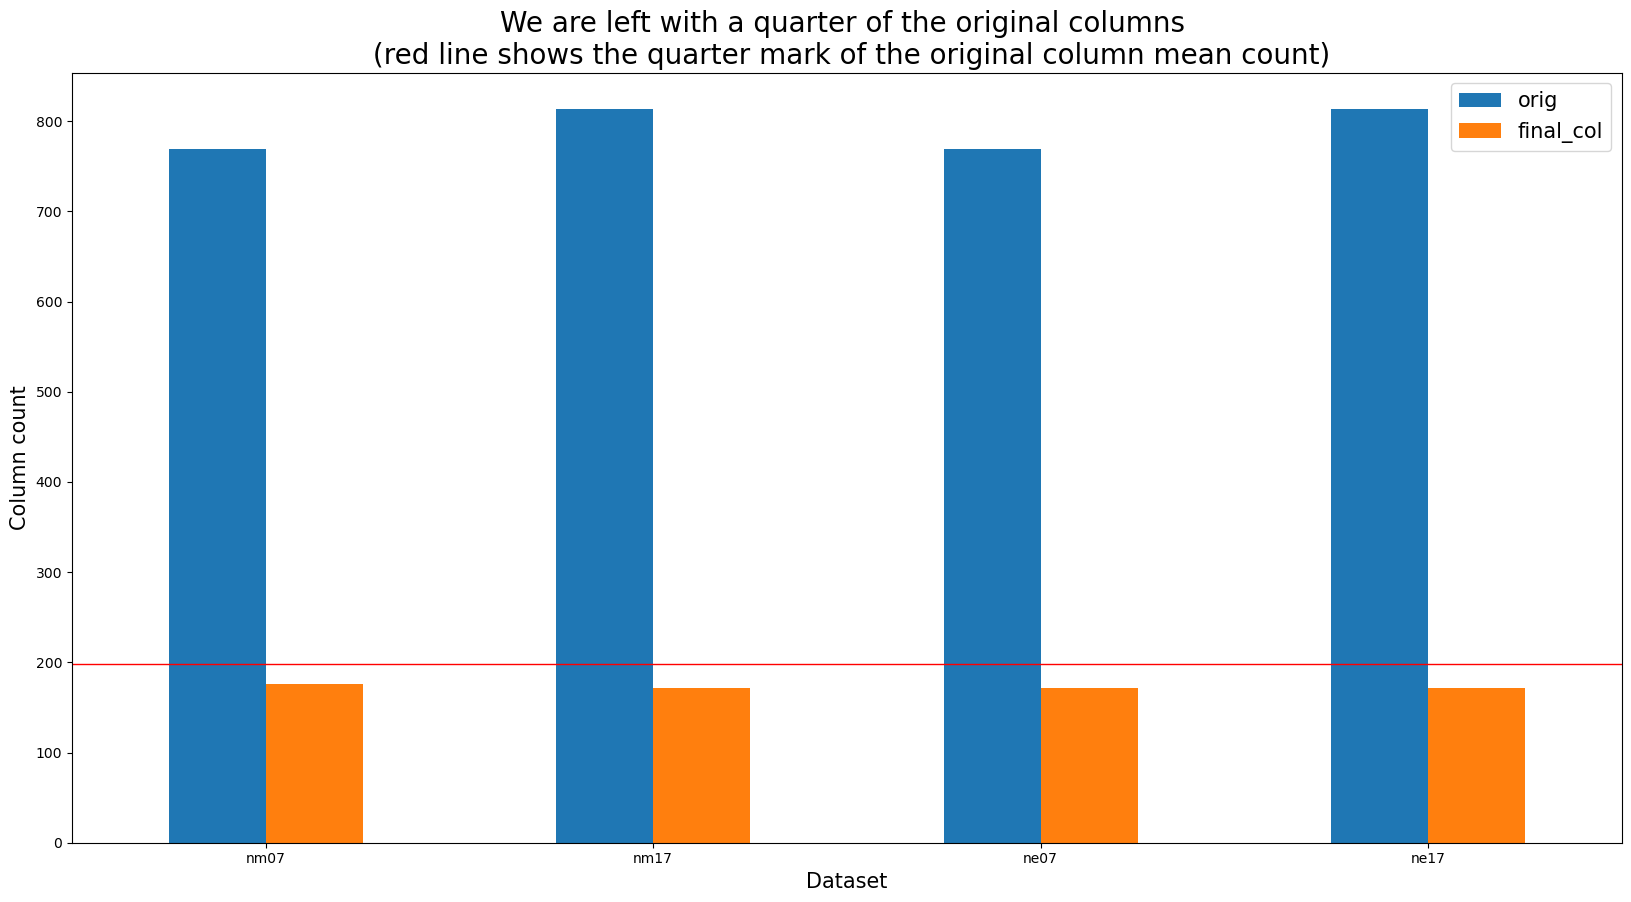

In [51]:
quarter= (all_df_att['orig'].mean())*.25

fig,ax= plt.subplots(figsize=(20,10))
all_df_att[['orig','final_col']].plot.bar(ax=ax)
plt.xlabel('Dataset',fontsize=15)
plt.ylabel('Column count',fontsize=15)
plt.xticks([0,1,2,3],labels=['nm07','nm17','ne07','ne17'],rotation=360)
plt.axhline(y=quarter,linewidth=1,color='r')
plt.legend(fontsize=15)
plt.title('We are left with a quarter of the original columns \n (red line shows the quarter mark of the original column mean count)', fontsize=20)
plt.savefig('./images/final_null.png');

Save Clean Files

In [52]:
nm07_target.reset_index(drop=True,inplace=True)
nm07= nm07.assign(CAT_ELIG=nm07_target)
nm07= nm07.astype('float64')
nm07.to_csv('./data/clean_nm07.csv',index=None)

In [53]:
nm17_target.reset_index(drop=True,inplace=True)
nm17= nm17.assign(CAT_ELIG=nm17_target)
nm17= nm17.astype('float64')
nm17.to_csv('./data/clean_nm17.csv',index=None)

In [54]:
ne07_target.reset_index(drop=True,inplace=True)
nm07= ne07.assign(CAT_ELIG=ne07_target)
ne07= ne07.astype('float64')
ne07.to_csv('./data/clean_ne07.csv',index=None)

In [55]:
ne17_target.reset_index(drop=True,inplace=True)
ne17= ne17.assign(CAT_ELIG=ne17_target)
ne17= ne17.astype('float64')
ne17.to_csv('./data/clean_ne17.csv',index=None)

In [56]:
ne17.shape

(964, 172)